In [1]:
# Import Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

In [2]:
# Importing the dataset
my_data = pd.read_excel('Win_Prediction_Data.xlsx')
my_data.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [3]:
newdata = my_data.copy()
newdata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [4]:
# Missing Values
newdata.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [5]:
# Percentage of missing data
newdata.isnull().sum()/len(newdata)*100

Client Category     0.78521
Solution Type       0.00000
Deal Date           0.00000
Sector              0.00000
Location            0.00000
VP Name             0.00000
Manager Name        0.00000
Deal Cost           0.00000
Deal Status Code    0.00000
dtype: float64

In [6]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


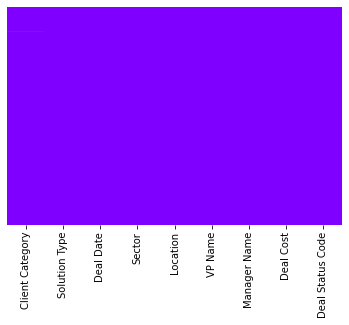

In [7]:
sns.heatmap(newdata.isnull(),yticklabels=False,cbar=False,cmap='rainbow')
plt.show()

In [8]:
# Handling Missing Values
Client_Category = newdata['Client Category'].value_counts()
Client_Category

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [9]:
newdata['Client Category'] = newdata['Client Category'].fillna('Others')

In [10]:
newdata.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [11]:
newdata.describe(include='O')

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [12]:
newdata['Deal Status Code'].value_counts()

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [13]:
Client_Category_index = newdata['Client Category'].value_counts().index
Client_Category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

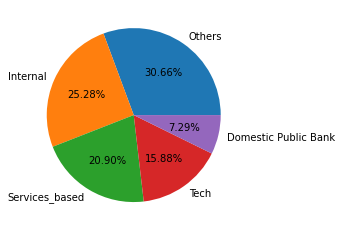

In [14]:
plt.pie(Client_Category[:5], labels=Client_Category_index[:5], autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

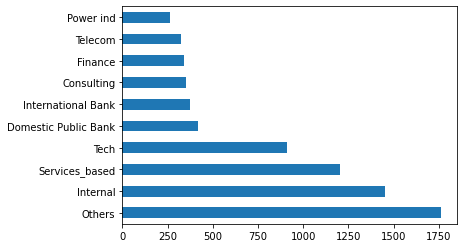

In [15]:
Client_Category[:10].plot(kind='barh')

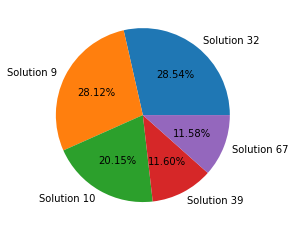

In [16]:
Sol_type= newdata['Solution Type'].value_counts()
Sol_type_index = newdata['Solution Type'].value_counts().index
plt.pie(Sol_type[:5], labels=Sol_type_index[:5], autopct='%1.2f%%')
plt.show()

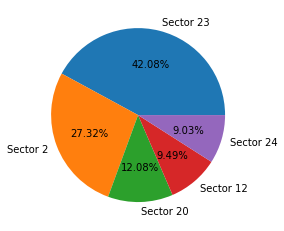

In [17]:
sector= newdata['Sector'].value_counts()
sector_index = newdata['Sector'].value_counts().index
plt.pie(sector[:5], labels=sector_index[:5], autopct='%1.2f%%')
plt.show()

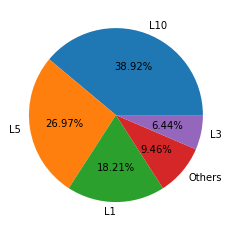

In [18]:
location= newdata['Location'].value_counts()
location_index = newdata['Location'].value_counts().index
plt.pie(location[:5], labels=location_index[:5], autopct='%1.2f%%')
plt.show()

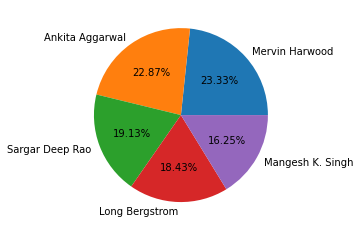

In [19]:
VP_Name=newdata['VP Name'].value_counts()
VP_Name_index = newdata['VP Name'].value_counts().index
plt.pie(VP_Name[:5], labels=VP_Name_index[:5], autopct='%1.2f%%')
plt.show()

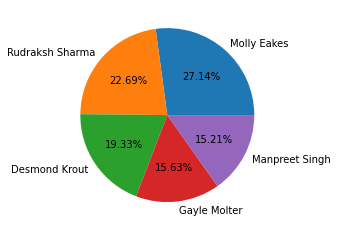

In [20]:
Manager_Name=newdata['Manager Name'].value_counts()
Manager_Name_index = newdata['Manager Name'].value_counts().index
plt.pie(Manager_Name[:5], labels=Manager_Name_index[:5], autopct='%1.2f%%')
plt.show()

In [21]:
# Relationships between different independent variables vs dependent variable
newdata.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won


In [22]:
rel_client_cat = newdata[['Client Category','Deal Status Code']].groupby(['Client Category','Deal Status Code']).size().reset_index().rename(columns={0:'Total Count'})

In [23]:
rel_client_cat

,Client Category,Deal Status Code,Total Count
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [24]:
sol_type_cat = newdata[['Solution Type','Deal Status Code']].groupby(['Solution Type','Deal Status Code']).size().reset_index().rename(columns={0:'Total Count'})

In [25]:
sol_type_cat

,Solution Type,Deal Status Code,Total Count
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [26]:
sector_cat = newdata[['Sector','Deal Status Code']].groupby(['Sector','Deal Status Code']).size().reset_index().rename(columns={0:'Total Count'})

In [27]:
sector_cat

,Sector,Deal Status Code,Total Count
0,Sector 1,Lost,158
1,Sector 1,Won,73
2,Sector 10,Lost,2
3,Sector 10,Won,1
4,Sector 11,Lost,86
5,Sector 11,Won,28
6,Sector 12,Lost,406
7,Sector 12,Won,201
8,Sector 13,Lost,148
9,Sector 13,Won,37


In [28]:
loc_cat = newdata[['Location','Deal Status Code']].groupby(['Location','Deal Status Code']).size().reset_index().rename(columns={0:'Total Count'})

In [29]:
loc_cat

,Location,Deal Status Code,Total Count
0,L1,Lost,912
1,L1,Won,660
2,L10,Lost,2230
3,L10,Won,1130
4,L11,Lost,232
5,L11,Won,135
6,L12,Lost,178
7,L12,Won,98
8,L2,Lost,6
9,L2,Won,2


In [30]:
VP_cat = newdata[['VP Name','Deal Status Code']].groupby(['VP Name','Deal Status Code']).size().reset_index().rename(columns={0:'Total Count'})

In [31]:
VP_cat

,VP Name,Deal Status Code,Total Count
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866
3,Ankita Aggarwal,Won,277
4,Brendon Wycoff,Lost,132
...,...,...,...
77,md. afsar,Lost,2
78,neeraj kumar,Lost,254
79,neeraj kumar,Won,217
80,som dutt,Lost,138


In [32]:
manager_cat = newdata[['Manager Name','Deal Status Code']].groupby(['Manager Name','Deal Status Code']).size().reset_index().rename(columns={0:'Total Count'})

In [33]:
manager_cat

,Manager Name,Deal Status Code,Total Count
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [34]:
pd.set_option('display.max_columns', None)
pd.pivot_table(newdata, index='Deal Status Code', columns='Manager Name', values='Deal Cost')

Manager Name,Aastha Gandhi,Abhinav Warrier,Abhishek Singhal,Abhiskek Kumar,Abhiskhek D,Abram Fines,Aditya Kumar,Aditya Tondon,Ahdarsha Jha,Ahswini Saini,Akasnah Arora,Akhil Biyas,Akshansh Chaudhary,Akshansh Goel,Akshant Garg,Akshay Gosh,Akshay Sharma,Akshit Khanna,Akul Jindal,Alam Syed,Ali Rafiq,Aman Gupta,Aman Singh,Amit Jain,Anand S. Pandey,Anand Vikram,Anchal Pandey,Andrew Michalowski,Anish Jonson,Anju Nanda,Ankit Bhutani,Ankita Aggarwal,Anmol Mehre,Annamaria Phung,Annett Mcmillen,Anoop Jatley,Antonio Yelvington,Arron Hack,Arti Bindra,Atul Chaudhary,Atul Kumar,Ayusha Gupta,Beutune Varma,Bhavya Saini,Brenton Launius,Cameron Deleeuw,Carroll Truehart,Chad Jamal,Chanchal sharma,Chloe Beiler,Cleotilde Biron,Clinton Mani,Cori Gillispie,D. Ankit,Danny Bolton,Darin Vath,Darla Dickinson,David Toms,Davis Gagner,Deepak Chandra Prakash,Dennis Faux,Desmond Krout,Devendra Vishvakarma,Donovan Rockwood,Doreen Amerman,Earline Langton,Edmund Brigham,Eesha Yadav,Ekta Zutshi,Elenor Halderman,Emil Knudsen,Eula Hallowell,Evalyn Rayner,Evangeline Kepley,Eva Harte,Florencio Quiros,Fredricka Bald,Ganesh Malwar,Gaurav Sameria,Gayle Molter,Genny Mcgivney,Geoffrey Recker,Gopa Trilochana,Gunjan Singh,Hardeep Suksma,Harpreet Bedi,Harsh Verma,Harshita Singh,Heath Mullarkey,Heeman Daga,Herschel Flock,Himanshu Daga,Himanshu Upadhiya,Ike Deppen,Jackie Wolfson,Jarred Parrino,Jasmin kaur,Jayadev Mitali,Jayant Kalra,Jean Sappington,Jewell Tunstall,Jitendra Choudhary,Joe Castorena,Johnna Lemay,Jose Gamber,Kamal Chandra,Kamal Deep,Kamaldeep Singh,Kamelesh Srinivasan,Kanika Sharma,Kaniksh Dhyani,Karan Dubey,Karna Bhuvennant,Kendra Tripathi,Kim Tavernier,Kittie Selvey,Kizzie Troxel,Lakendra Hartgrove,Laurine Quintanar,Leeladhar Pandey,Leticia Denton,Lino Batterton,Lokesh Pinani,Long Bergstrom,Luv Malhotra,Mahesh Gulati,Mangesh K. Singh,Manish Johar,Manish Saundriyal,Manisha Gulati,Manisha Saundriyal,Mannan Upadhiya,Manpreet Singh,Marcella Mo,Marcelo Riles,Martin Cheyne,Matt Redel,Mayank Praveen,Md Irshad,Md. Daud,Mervin Harwood,Millicent Firth,Molly Eakes,Muoi Queener,Nanette Hennessee,Natalia Dumlao,Naveen Dogra,Navita Chauhan,Neha Sharma,Nitish Bhardwaj,Palmer Holmberg,Prakash Dhawale,Prakash Srinivas,Prashant Rawat,Prashant singh,Prateek Dhotre,Preetan Gujar,Preeti Mehra,Preston Dumire,R. T. Ramakrishnan,Rahul Bajpai,Rahul Kocher,Rahul Singh,Raj Pinani,Rajat Bansal,Rajneesh Tanwar,Ralph Bohon,Randy Fontana,Ranjan Prakash,Ranjnesh Tanwar,Rateesh Singh,Ravi Chaudhary,Rayford Durgan,Rishab Bhatt,Rishab Jain,Rodney Wilkison,Roop Sachdeva,Roopal Chaudhary,Roopal Singh,Rosana Yokum,Rosanna Maynez,Royal Garofalo,Rudraksh Sharma,Russell Dahlen,Russ Vaz,Sai S Sabitha,Sanchita Gulati,Sanchita Pant,Saneel Tyagi,Sangeet Daga,Sang Ingle,Sanjeev Diwakar,Sanjeev Talreja,Sargar Deep Rao,Sarwan Singh,Saurabh Singh,Sergio Cusack,Shalendra D.,Sharavan Singh,Sherell Peace,Shobhit Gupta,Siddhant Gaur,Sierra Yamamoto,Sohil Kumar,Somnath Mukherji,Son Mcconnaughy,Sooraj Vohra,Subhangi Sood,Sultan Khan,Sumit Arora,Sumita Verma,Tafeeq Khan,Tanu Panwar,Tanuj Bindra,Taran Deep,Taran Singh,Tarun Garg,Theron Rex,Thurman Niemi,Tom Blanca,Umesh Kholi,Upendra Bhatt,Uzaar Ali,Vaibhav Somaskandan,Vaibhav singh,Varsha Arora,Varun Behl,Varun Bhel,Vidur Hukle,Vikram Rawat,Vikrant Saini,Vikrant Soneja,Vinay Kumar,Vincenzo Mushrush,Virak Kandpal,Vishvajeet Kumar,Waseem Khan,Zachary Oconner,Zulema Perrine,aamir hussain,bablu regar,bhagwati prasad,birender mandal,farmaan khan,gurmit singh,jamil khan,kailash kumar,kamal jit singh,keshar ansari,khadak singh,lalit kathuriya,maansingh aswal,mayank chaudhary @ rahul,mohd ataullah,mohd khairul,mohd shakib,nahar singh,neeraj kumar,pankaj kumar,pooran chand,rahul kumar,rahul sharma,ram dutt gupta,ram kumar,ramdin verma,rijul aggarwal,riyasat ali,rohit,shafibul,sharat chandran,sheak shakir,shiv kumar,shiv shakti singh,shyam kumar,som dutt,sunder paal,vansu dev,vinit katariya
Deal Status Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [35]:
pd.set_option('display.max_columns', None)
pd.pivot_table(newdata, index='Deal Status Code', columns='VP Name', values='Deal Cost')

VP Name,Alam Syed,Ankita Aggarwal,Brendon Wycoff,Clinton Mani,Dennis Faux,Earline Langton,Ekta Zutshi,Gaurav Sameria,Gayle Molter,Gopa Trilochana,Hardeep Suksma,Jewell Tunstall,Jitendra Choudhary,Kamelesh Srinivasan,Kirk Hofmeister,Lilli Storrs,Long Bergstrom,Mangesh K. Singh,Manpreet Singh,Man Suddeth,Marcella Mo,Mayank Mewar,Mervin Harwood,Molly Eakes,P. Somya,Prashant Rawat,Rahul Bajpai,Rahul Kocher,Rosanna Maynez,Rudraksh Sharma,Russell Dahlen,Sargar Deep Rao,Sarthak Batra,Saurabh Singh,Son Mcconnaughy,Varsha Arora,Vidur Hukle,Vikram Rawat,Visvajeet Das,Waylon Mulder,md. afsar,neeraj kumar,som dutt
Deal Status Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lost,1.087144e+06,654206.63000,1.096894e+06,776755.218548,554656.861667,1.189219e+06,7.912821e+05,554590.017879,7.291971e+05,1.464321e+06,1.085656e+06,463629.412400,354779.4125,1048039.215,441176.47,2.474790e+06,424815.686756,7.359698e+05,781058.82400,6.836029e+05,6.838235e+05,423970.588333,941546.896272,9.343316e+05,1058823.53,6.666667e+05,626593.750188,1.330656e+06,660382.839545,1.361961e+06,484615.385641,653196.721607,1235294.12,761066.176429,1.517227e+06,7.272255e+05,615517.241724,1.681103e+06,1176470.59,235294.12,3235294.12,478943.956142,554650.469710
Won,1.172937e+06,503528.35065,1.909288e+06,600857.843500,315294.120000,6.034314e+05,1.021396e+06,586433.823958,1.282863e+06,8.195701e+05,8.944391e+05,480210.085179,725490.1975,558823.530,NaN,3.876716e+05,650244.786157,1.297066e+06,622481.61875,1.814118e+06,1.125123e+06,836505.191765,640622.233253,1.069588e+06,NaN,1.014686e+06,533073.022414,3.674510e+05,559319.234101,6.465273e+05,375524.065636,583792.078092,NaN,962863.052187,5.470632e+05,3.454505e+06,540581.233095,5.161111e+05,5588235.29,88235.29,NaN,693700.190092,562977.044756


In [36]:
import datetime
newdata['Deal Year'] = newdata['Deal Date'].dt.year

In [37]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


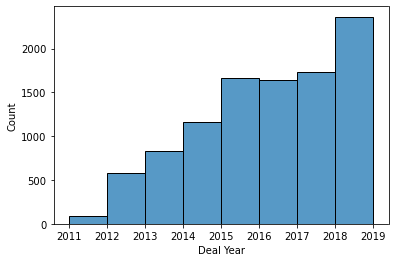

In [38]:
sns.histplot(newdata['Deal Year'],bins=8)
plt.show()

In [39]:
newdata['Deal Month'] = newdata['Deal Date'].dt.month

In [40]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


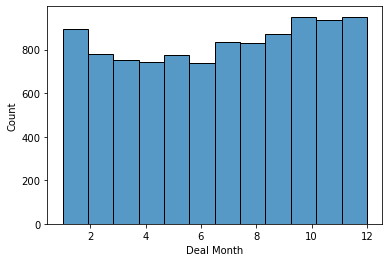

In [41]:
sns.histplot(newdata['Deal Month'],bins=12)
plt.show()

In [42]:
newdata['Deal Quarter'] = newdata['Deal Date'].dt.quarter
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month,Deal Quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


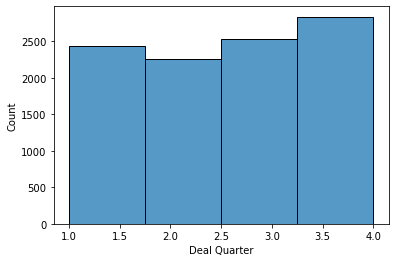

In [43]:
sns.histplot(newdata['Deal Quarter'],bins=4)
plt.show()

<AxesSubplot:>

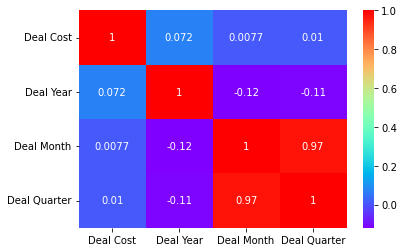

In [44]:
sns.heatmap(newdata.corr(),annot=True,cmap='rainbow')

In [45]:
newdata['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [46]:
newdata = newdata.drop(['Deal Date'],axis=1)

In [47]:
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month,Deal Quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [48]:
columns = ['Client Category','Solution Type','Sector','Location','VP Name','Manager Name','Deal Status Code']
for i in columns:
    newdata[i] = newdata[i].astype('category')
    newdata[i] = newdata[i].cat.codes

In [49]:
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month,Deal Quarter
0,39,64,16,7,6,82,150000.00,1,2012,3,1
1,39,64,16,7,6,82,744705.88,1,2012,9,3
2,19,54,12,12,6,183,60000.00,0,2011,8,3
3,19,54,12,12,6,183,60000.00,0,2011,4,2
4,19,25,12,12,6,183,80882.35,0,2011,6,2


In [50]:
newdata = newdata.iloc[:,:8]
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,39,64,16,7,6,82,150000.00,1
1,39,64,16,7,6,82,744705.88,1
2,19,54,12,12,6,183,60000.00,0
3,19,54,12,12,6,183,60000.00,0
4,19,25,12,12,6,183,80882.35,0


In [51]:
# Splitting the data into independent and dependent variables
x = newdata.iloc[:,:7].values
y = newdata['Deal Status Code'].values

In [52]:
x

array([[3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 1.50000000e+05],
       [3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 7.44705880e+05],
       [1.90000000e+01, 5.40000000e+01, 1.20000000e+01, ...,
        6.00000000e+00, 1.83000000e+02, 6.00000000e+04],
       ...,
       [3.10000000e+01, 6.60000000e+01, 2.40000000e+01, ...,
        2.90000000e+01, 1.82000000e+02, 5.88235290e+05],
       [3.10000000e+01, 5.80000000e+01, 2.40000000e+01, ...,
        1.90000000e+01, 5.00000000e+01, 3.04205882e+06],
       [2.80000000e+01, 6.60000000e+01, 3.00000000e+00, ...,
        3.40000000e+01, 2.16000000e+02, 1.47058820e+05]])

In [53]:
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int8)

In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [55]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

In [56]:
# Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7545, 7)
(2516, 7)
(7545,)
(2516,)


# Logistic Regression Model


In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred_train_lr = lr.predict(x_train)
y_pred_test_lr = lr.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print("Accuracy Score of training dataset:",accuracy_score(y_train,y_pred_train_lr))
print("Accuracy Score of test dataset:",accuracy_score(y_test,y_pred_test_lr))

Accuracy Score of training dataset: 0.6196156394963552
Accuracy Score of test dataset: 0.6474562798092209


# XGBoost Model

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [64]:
print("Accuracy Score of training dataset:",accuracy_score(y_train,y_pred_train_xgb))
print("Accuracy Score of test dataset:",accuracy_score(y_test,y_pred_test_xgb))

Accuracy Score of training dataset: 0.9271040424121935
Accuracy Score of test dataset: 0.794912559618442


In [65]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(xgb,x_test,y_test,cv=15)
print("Accuracy Score of test dataset:",accuracy_test[7])

Accuracy Score of test dataset: 0.7976190476190477


# Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [68]:
print("Accuracy Score of training dataset:",accuracy_score(y_train,y_pred_train_rf))
print("Accuracy Score of test dataset:",accuracy_score(y_test,y_pred_test_rf))

Accuracy Score of training dataset: 0.9965540092776674
Accuracy Score of test dataset: 0.8302861685214626


In [69]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(rf,x_test,y_test,cv=15)
print("Accuracy Score of test dataset:",accuracy_test)

Accuracy Score of test dataset: [0.70833333 0.69642857 0.69642857 0.68452381 0.74404762 0.69047619
 0.75       0.75595238 0.76190476 0.75       0.7202381  0.73652695
 0.69461078 0.73652695 0.75449102]


# Naive Bayes Algorithm

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [71]:
y_pred_train_nb = nb.predict(x_train)
y_pred_test_nb = nb.predict(x_test)

In [72]:
print("Accuracy Score of training dataset:",accuracy_score(y_train,y_pred_train_nb))
print("Accuracy Score of test dataset:",accuracy_score(y_test,y_pred_test_nb))

Accuracy Score of training dataset: 0.6185553346587144
Accuracy Score of test dataset: 0.6494435612082671


# Deep Neural Network

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
dnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
dnn.fit(x_train,y_train, batch_size=32, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
236/236 [==============================] - 2s 5ms/step - loss: 0.6632 - accuracy: 0.6196 - val_loss: 0.6422 - val_accuracy: 0.6483
Epoch 2/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6539 - accuracy: 0.6200 - val_loss: 0.6440 - val_accuracy: 0.6490
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6499 - accuracy: 0.6232 - val_loss: 0.6385 - val_accuracy: 0.6494
Epoch 4/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.6236 - val_loss: 0.6357 - val_accuracy: 0.6490
Epoch 5/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6420 - accuracy: 0.6315 - val_loss: 0.6364 - val_accuracy: 0.6391
Epoch 6/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6378 - accuracy: 0.6400 - val_loss: 0.6351 - val_accuracy: 0.6431
Epoch 7/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6343 - accuracy: 0.6399 - val_loss: 0.6354 - val_accuracy: 0.6467

Epoch 58/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5428 - accuracy: 0.7280 - val_loss: 0.6109 - val_accuracy: 0.6864
Epoch 59/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5406 - accuracy: 0.7264 - val_loss: 0.6162 - val_accuracy: 0.6904
Epoch 60/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5410 - accuracy: 0.7317 - val_loss: 0.6145 - val_accuracy: 0.6781
Epoch 61/100
236/236 [==============================] - 1s 2ms/step - loss: 0.5425 - accuracy: 0.7259 - val_loss: 0.6110 - val_accuracy: 0.6824
Epoch 62/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5394 - accuracy: 0.7247 - val_loss: 0.6106 - val_accuracy: 0.6904
Epoch 63/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5378 - accuracy: 0.7272 - val_loss: 0.6118 - val_accuracy: 0.6952
Epoch 64/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5378 - accuracy: 0.7294 - val_loss: 0.6258 - val_accuracy:

In [75]:
dnn.fit(x_train,y_train, batch_size=32, epochs=500, validation_data=(x_test,y_test))

Epoch 1/500
236/236 [==============================] - 1s 3ms/step - loss: 0.5099 - accuracy: 0.7462 - val_loss: 0.6132 - val_accuracy: 0.6896
Epoch 2/500
236/236 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.7491 - val_loss: 0.6151 - val_accuracy: 0.6975
Epoch 3/500
236/236 [==============================] - 1s 3ms/step - loss: 0.5083 - accuracy: 0.7471 - val_loss: 0.6201 - val_accuracy: 0.6932
Epoch 4/500
236/236 [==============================] - 1s 3ms/step - loss: 0.5078 - accuracy: 0.7482 - val_loss: 0.6162 - val_accuracy: 0.6896
Epoch 5/500
236/236 [==============================] - 1s 3ms/step - loss: 0.5099 - accuracy: 0.7469 - val_loss: 0.6154 - val_accuracy: 0.6924
Epoch 6/500
236/236 [==============================] - 1s 3ms/step - loss: 0.5046 - accuracy: 0.7522 - val_loss: 0.6175 - val_accuracy: 0.6932
Epoch 7/500
236/236 [==============================] - 1s 3ms/step - loss: 0.5074 - accuracy: 0.7463 - val_loss: 0.6130 - val_accuracy: 0.6924

Epoch 58/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4809 - accuracy: 0.7670 - val_loss: 0.6218 - val_accuracy: 0.6975
Epoch 59/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4777 - accuracy: 0.7630 - val_loss: 0.6238 - val_accuracy: 0.7043
Epoch 60/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4808 - accuracy: 0.7667 - val_loss: 0.6282 - val_accuracy: 0.7047
Epoch 61/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.7678 - val_loss: 0.6346 - val_accuracy: 0.7039
Epoch 62/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4802 - accuracy: 0.7643 - val_loss: 0.6314 - val_accuracy: 0.6916
Epoch 63/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4783 - accuracy: 0.7686 - val_loss: 0.6138 - val_accuracy: 0.7083
Epoch 64/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4766 - accuracy: 0.7675 - val_loss: 0.6183 - val_accuracy:

Epoch 115/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.7840 - val_loss: 0.6329 - val_accuracy: 0.7019
Epoch 116/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7787 - val_loss: 0.6348 - val_accuracy: 0.6975
Epoch 117/500
236/236 [==============================] - 1s 2ms/step - loss: 0.4593 - accuracy: 0.7781 - val_loss: 0.6394 - val_accuracy: 0.6916
Epoch 118/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4619 - accuracy: 0.7746 - val_loss: 0.6455 - val_accuracy: 0.7003
Epoch 119/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.7773 - val_loss: 0.6458 - val_accuracy: 0.6995
Epoch 120/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.7796 - val_loss: 0.6412 - val_accuracy: 0.7035
Epoch 121/500
236/236 [==============================] - 1s 2ms/step - loss: 0.4549 - accuracy: 0.7824 - val_loss: 0.6554 - val_ac

236/236 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.7854 - val_loss: 0.6481 - val_accuracy: 0.7103
Epoch 172/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.7845 - val_loss: 0.6480 - val_accuracy: 0.7011
Epoch 173/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4458 - accuracy: 0.7863 - val_loss: 0.6548 - val_accuracy: 0.7019
Epoch 174/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4449 - accuracy: 0.7857 - val_loss: 0.6648 - val_accuracy: 0.7035
Epoch 175/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.7886 - val_loss: 0.6693 - val_accuracy: 0.6832
Epoch 176/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4485 - accuracy: 0.7825 - val_loss: 0.6494 - val_accuracy: 0.7130
Epoch 177/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.7834 - val_loss: 0.6619 - val_accuracy: 0.6884

236/236 [==============================] - 1s 4ms/step - loss: 0.4338 - accuracy: 0.7968 - val_loss: 0.6792 - val_accuracy: 0.7099
Epoch 228/500
236/236 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.7944 - val_loss: 0.6779 - val_accuracy: 0.6904
Epoch 229/500
236/236 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.7914 - val_loss: 0.6654 - val_accuracy: 0.7099
Epoch 230/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.7971 - val_loss: 0.6704 - val_accuracy: 0.7134
Epoch 231/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.7918 - val_loss: 0.6774 - val_accuracy: 0.7122
Epoch 232/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.7958 - val_loss: 0.6804 - val_accuracy: 0.7075
Epoch 233/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4319 - accuracy: 0.7940 - val_loss: 0.6778 - val_accuracy: 0.7019

236/236 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.7972 - val_loss: 0.6790 - val_accuracy: 0.7079
Epoch 284/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8062 - val_loss: 0.6874 - val_accuracy: 0.6952
Epoch 285/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4215 - accuracy: 0.8023 - val_loss: 0.6827 - val_accuracy: 0.7031
Epoch 286/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4228 - accuracy: 0.8003 - val_loss: 0.6912 - val_accuracy: 0.7035
Epoch 287/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4227 - accuracy: 0.7955 - val_loss: 0.6967 - val_accuracy: 0.7015
Epoch 288/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.7975 - val_loss: 0.7008 - val_accuracy: 0.7007
Epoch 289/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4221 - accuracy: 0.8015 - val_loss: 0.6807 - val_accuracy: 0.7110

236/236 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8013 - val_loss: 0.6961 - val_accuracy: 0.7182
Epoch 340/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8099 - val_loss: 0.7021 - val_accuracy: 0.7051
Epoch 341/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4147 - accuracy: 0.8056 - val_loss: 0.6967 - val_accuracy: 0.7039
Epoch 342/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8036 - val_loss: 0.7007 - val_accuracy: 0.7035
Epoch 343/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8058 - val_loss: 0.7080 - val_accuracy: 0.6999
Epoch 344/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8032 - val_loss: 0.7171 - val_accuracy: 0.6971
Epoch 345/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8102 - val_loss: 0.7005 - val_accuracy: 0.7035

236/236 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8083 - val_loss: 0.7218 - val_accuracy: 0.7027
Epoch 396/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8109 - val_loss: 0.7167 - val_accuracy: 0.6987
Epoch 397/500
236/236 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8144 - val_loss: 0.7203 - val_accuracy: 0.7114
Epoch 398/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8102 - val_loss: 0.7288 - val_accuracy: 0.7019
Epoch 399/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8125 - val_loss: 0.7177 - val_accuracy: 0.6987
Epoch 400/500
236/236 [==============================] - 1s 4ms/step - loss: 0.4029 - accuracy: 0.8123 - val_loss: 0.7164 - val_accuracy: 0.7095
Epoch 401/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4020 - accuracy: 0.8114 - val_loss: 0.7070 - val_accuracy: 0.7118

236/236 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8208 - val_loss: 0.7157 - val_accuracy: 0.7075
Epoch 452/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8131 - val_loss: 0.7200 - val_accuracy: 0.7079
Epoch 453/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8123 - val_loss: 0.7214 - val_accuracy: 0.7118
Epoch 454/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8150 - val_loss: 0.7331 - val_accuracy: 0.7023
Epoch 455/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 0.8188 - val_loss: 0.7231 - val_accuracy: 0.7107
Epoch 456/500
236/236 [==============================] - 1s 3ms/step - loss: 0.4005 - accuracy: 0.8129 - val_loss: 0.7198 - val_accuracy: 0.7150
Epoch 457/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8212 - val_loss: 0.7166 - val_accuracy: 0.7166

In [76]:
dnn.fit(x_train,y_train, batch_size=32, epochs=500, validation_data=(x_test,y_test))

Epoch 1/500
236/236 [==============================] - 1s 5ms/step - loss: 0.3962 - accuracy: 0.8168 - val_loss: 0.7605 - val_accuracy: 0.6773
Epoch 2/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3936 - accuracy: 0.8167 - val_loss: 0.7315 - val_accuracy: 0.7095
Epoch 3/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.8184 - val_loss: 0.7563 - val_accuracy: 0.6975
Epoch 4/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3901 - accuracy: 0.8191 - val_loss: 0.7418 - val_accuracy: 0.7134
Epoch 5/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.8205 - val_loss: 0.7466 - val_accuracy: 0.6916
Epoch 6/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3930 - accuracy: 0.8186 - val_loss: 0.7452 - val_accuracy: 0.7063
Epoch 7/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3900 - accuracy: 0.8172 - val_loss: 0.7488 - val_accuracy: 0.6999

Epoch 58/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3923 - accuracy: 0.8182 - val_loss: 0.7509 - val_accuracy: 0.7154
Epoch 59/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3903 - accuracy: 0.8188 - val_loss: 0.7503 - val_accuracy: 0.7003
Epoch 60/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3869 - accuracy: 0.8227 - val_loss: 0.7521 - val_accuracy: 0.7095
Epoch 61/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8215 - val_loss: 0.7401 - val_accuracy: 0.7023
Epoch 62/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8203 - val_loss: 0.7498 - val_accuracy: 0.7015
Epoch 63/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3898 - accuracy: 0.8197 - val_loss: 0.7499 - val_accuracy: 0.6952
Epoch 64/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3859 - accuracy: 0.8217 - val_loss: 0.7457 - val_accuracy:

Epoch 115/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3846 - accuracy: 0.8254 - val_loss: 0.7450 - val_accuracy: 0.7099
Epoch 116/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3828 - accuracy: 0.8231 - val_loss: 0.7544 - val_accuracy: 0.7011
Epoch 117/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3817 - accuracy: 0.8250 - val_loss: 0.7543 - val_accuracy: 0.6979
Epoch 118/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3799 - accuracy: 0.8240 - val_loss: 0.7448 - val_accuracy: 0.7027
Epoch 119/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8253 - val_loss: 0.7590 - val_accuracy: 0.7134
Epoch 120/500
236/236 [==============================] - 1s 5ms/step - loss: 0.3820 - accuracy: 0.8264 - val_loss: 0.7859 - val_accuracy: 0.6852
Epoch 121/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3864 - accuracy: 0.8231 - val_loss: 0.7466 - val_ac

236/236 [==============================] - 1s 4ms/step - loss: 0.3827 - accuracy: 0.8203 - val_loss: 0.7484 - val_accuracy: 0.7099
Epoch 172/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3814 - accuracy: 0.8243 - val_loss: 0.7492 - val_accuracy: 0.7178
Epoch 173/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8250 - val_loss: 0.7835 - val_accuracy: 0.6816
Epoch 174/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3825 - accuracy: 0.8232 - val_loss: 0.7426 - val_accuracy: 0.7114
Epoch 175/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8252 - val_loss: 0.7654 - val_accuracy: 0.6979
Epoch 176/500
236/236 [==============================] - 1s 5ms/step - loss: 0.3801 - accuracy: 0.8277 - val_loss: 0.7460 - val_accuracy: 0.7214
Epoch 177/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8237 - val_loss: 0.7578 - val_accuracy: 0.7166

236/236 [==============================] - 1s 4ms/step - loss: 0.3796 - accuracy: 0.8247 - val_loss: 0.7597 - val_accuracy: 0.6908
Epoch 228/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3775 - accuracy: 0.8272 - val_loss: 0.7627 - val_accuracy: 0.7194
Epoch 229/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3816 - accuracy: 0.8235 - val_loss: 0.7633 - val_accuracy: 0.7174
Epoch 230/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3757 - accuracy: 0.8266 - val_loss: 0.7750 - val_accuracy: 0.7246
Epoch 231/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8252 - val_loss: 0.7517 - val_accuracy: 0.7190
Epoch 232/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8269 - val_loss: 0.7577 - val_accuracy: 0.7146
Epoch 233/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3755 - accuracy: 0.8243 - val_loss: 0.7407 - val_accuracy: 0.7174

236/236 [==============================] - 1s 4ms/step - loss: 0.3738 - accuracy: 0.8307 - val_loss: 0.7636 - val_accuracy: 0.7170
Epoch 284/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3716 - accuracy: 0.8288 - val_loss: 0.7678 - val_accuracy: 0.6991
Epoch 285/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8282 - val_loss: 0.7757 - val_accuracy: 0.7071
Epoch 286/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.8286 - val_loss: 0.7689 - val_accuracy: 0.7103
Epoch 287/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3745 - accuracy: 0.8285 - val_loss: 0.7493 - val_accuracy: 0.7122
Epoch 288/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3733 - accuracy: 0.8264 - val_loss: 0.7628 - val_accuracy: 0.7182
Epoch 289/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3702 - accuracy: 0.8335 - val_loss: 0.7516 - val_accuracy: 0.7214

236/236 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8277 - val_loss: 0.7693 - val_accuracy: 0.7130
Epoch 340/500
236/236 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8280 - val_loss: 0.7731 - val_accuracy: 0.7198
Epoch 341/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3757 - accuracy: 0.8247 - val_loss: 0.7701 - val_accuracy: 0.7099
Epoch 342/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8253 - val_loss: 0.7811 - val_accuracy: 0.7158
Epoch 343/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3693 - accuracy: 0.8311 - val_loss: 0.7881 - val_accuracy: 0.7230
Epoch 344/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3745 - accuracy: 0.8277 - val_loss: 0.7716 - val_accuracy: 0.7095
Epoch 345/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3752 - accuracy: 0.8309 - val_loss: 0.7750 - val_accuracy: 0.7170

236/236 [==============================] - 1s 4ms/step - loss: 0.3672 - accuracy: 0.8285 - val_loss: 0.7723 - val_accuracy: 0.7210
Epoch 396/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3653 - accuracy: 0.8347 - val_loss: 0.7753 - val_accuracy: 0.7134
Epoch 397/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3757 - accuracy: 0.8306 - val_loss: 0.7653 - val_accuracy: 0.7285
Epoch 398/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3731 - accuracy: 0.8225 - val_loss: 0.7665 - val_accuracy: 0.7186
Epoch 399/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3630 - accuracy: 0.8364 - val_loss: 0.7782 - val_accuracy: 0.7047
Epoch 400/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3735 - accuracy: 0.8260 - val_loss: 0.7658 - val_accuracy: 0.7273
Epoch 401/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3678 - accuracy: 0.8286 - val_loss: 0.7829 - val_accuracy: 0.7250

236/236 [==============================] - 1s 4ms/step - loss: 0.3649 - accuracy: 0.8355 - val_loss: 0.7876 - val_accuracy: 0.7170
Epoch 452/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3657 - accuracy: 0.8270 - val_loss: 0.7863 - val_accuracy: 0.7226
Epoch 453/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3629 - accuracy: 0.8321 - val_loss: 0.7892 - val_accuracy: 0.7178
Epoch 454/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3764 - accuracy: 0.8252 - val_loss: 0.7873 - val_accuracy: 0.7273
Epoch 455/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3689 - accuracy: 0.8306 - val_loss: 0.7906 - val_accuracy: 0.7166
Epoch 456/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3676 - accuracy: 0.8305 - val_loss: 0.7929 - val_accuracy: 0.7226
Epoch 457/500
236/236 [==============================] - 1s 4ms/step - loss: 0.3665 - accuracy: 0.8346 - val_loss: 0.8023 - val_accuracy: 0.7218